In [310]:
import os
import string
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf

data_dir = Path('../data')

income_groups_1639 = pd.read_csv(data_dir / 'interim' / 'income_groups_1639.csv', index_col='district')
income_1880 = pd.read_csv(data_dir / 'interim' / 'income_tax_record_1880.csv', index_col=0)
income_1880['total_tax'] = income_1880.sum(axis=1)

C:\Users\antth\AppData\Local\Temp\ipykernel_12688\1003175346.py:14: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [311]:
totals = income_groups_1639.sum(axis=0)
percentiles = (totals / totals.sum()).round(2)
cum_percentiles = percentiles.cumsum()
cum_percentiles

no_tax    0.08
12_ore    0.73
16_ore    1.00
dtype: float64

In [312]:
breaks = income_1880.total_tax.quantile(cum_percentiles)
breaks

0.08      1.0
0.73      3.0
1.00    562.0
Name: total_tax, dtype: float64

In [313]:
classes = pd.cut(
    income_1880.total_tax,
    bins=[0] + list(breaks),
    labels=[1, 2, 3],
)
income_1880['class'] = classes
income_1880.loc[0:518, 'district'] = 'Vanha_kaupunki'
income_1880

,district,plot_number,estate_income,business_income,salary_pension_income,total_tax,class
0,Vanha_kaupunki,1,0.0,0.0,3.0,3.0,2
1,Vanha_kaupunki,2,15.0,0.0,25.0,40.0,3
2,Vanha_kaupunki,2,0.0,0.0,1.0,1.0,1
3,Vanha_kaupunki,2,0.0,0.0,1.0,1.0,1
4,Vanha_kaupunki,2,0.0,0.0,40.0,40.0,3
...,...,...,...,...,...,...,...
3331,Sorvalinsaari,18,0.0,0.0,1.0,1.0,1
3332,Sorvalinsaari,18,0.0,0.0,1.0,1.0,1
3333,Sorvalinsaari,19,0.0,0.0,1.0,1.0,1
3334,Sorvalinsaari,19,0.0,0.0,1.0,1.0,1


In [314]:
cross = income_1880[["district", "class", "plot_number"]].groupby(["district", "class"]).count()
cross.rename(columns={'plot_number': 'count'}, inplace=True)
cross.to_csv(data_dir / 'processed' / 'classes_by_district_1880.csv')
cross

count
district             class       
Anina                1        155
                     2         27
                     3          5
Havi                 1         24
                     2          2
                     3          2
Hiekka               1         60
                     2         13
                     3         13
Huusniemi            1          0
                     2          1
                     3          0
Likolampi            1         31
                     2          4
                     3          1
Monrepos             1          5
                     2          0
                     3          0
P_Annan_kruunu       1         15
                     2          5
                     3          8
Pantsarlahti         1        338
                     2         57
                     3         18
Papula               1         39
                     2         10
                     3         16
Paulovski            1        158
                     2          8
                     3          0
Pietarin_esikaupunki 1        543
                     2        190
                     3        171
Pikiruukki           1         30
                     2          5
                     3          3
Repola               1         25
                     2         13
                     3         41
Salakkalahti         1         26
                     2         19
                     3         67
Saunalahti           1         25
                     2          9
                     3         12
Sorvalinsaari        1         82
                     2          8
                     3          0
Talikkala            1         14
                     2          0
                     3          1
Valli                1        103
                     2         68
                     3         70
Vanha_kaupunki       1        176
                     2        123
                     3        220
Viipurin_esikaupunki 1        123
                     2         87
                     3         66

In [315]:
import cufflinks as cf

cross = cross.reset_index()
cross = cross.pivot(index='district', columns='class', values='count')
# cross = cross[['3', '2', '1']]
cross.sum(axis=1)

district
Anina                   187
Havi                     28
Hiekka                   86
Huusniemi                 1
Likolampi                36
Monrepos                  5
P_Annan_kruunu           28
Pantsarlahti            413
Papula                   65
Paulovski               166
Pietarin_esikaupunki    904
Pikiruukki               38
Repola                   79
Salakkalahti            112
Saunalahti               46
Sorvalinsaari            90
Talikkala                15
Valli                   241
Vanha_kaupunki          519
Viipurin_esikaupunki    276
dtype: int64

In [316]:
income_groups_1639_pct = income_groups_1639.copy()
income_groups_1639_pct['no_tax'] = income_groups_1639['no_tax'] / income_groups_1639.sum(axis=1)
income_groups_1639_pct['12_ore'] = income_groups_1639['12_ore'] / income_groups_1639.sum(axis=1)
income_groups_1639_pct['16_ore'] = income_groups_1639['16_ore'] / income_groups_1639.sum(axis=1)
income_groups_1639_pct

,no_tax,12_ore,16_ore
district,,,
Kaupunki,0.028024,0.148968,0.823009
Valli,0.160900,0.839100,0.000000
Siikaniemi,0.082474,0.917526,0.000000
Pantsarlahti,0.000000,1.000000,0.000000
tenant_farmers,0.000000,1.000000,0.000000


In [317]:
cross_pct = cross.copy()
cross_pct[3] = cross[3] / cross.sum(axis=1)
cross_pct[2] = cross[2] / cross.sum(axis=1)
cross_pct[1] = cross[1] / cross.sum(axis=1)
cross_pct

class,1,2,3
district,,,
Anina,0.828877,0.144385,0.026738
Havi,0.857143,0.071429,0.071429
Hiekka,0.697674,0.151163,0.151163
Huusniemi,0.000000,1.000000,0.000000
Likolampi,0.861111,0.111111,0.027778
Monrepos,1.000000,0.000000,0.000000
P_Annan_kruunu,0.535714,0.178571,0.285714
Pantsarlahti,0.818402,0.138015,0.043584
Papula,0.600000,0.153846,0.246154


<AxesSubplot:ylabel='district'>

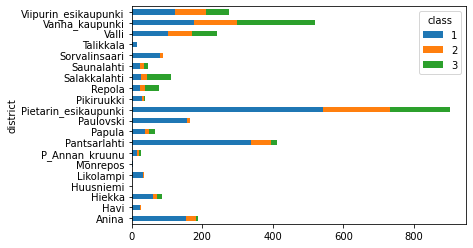

In [318]:
cross.plot(kind='barh', stacked=True)

<AxesSubplot:ylabel='district'>

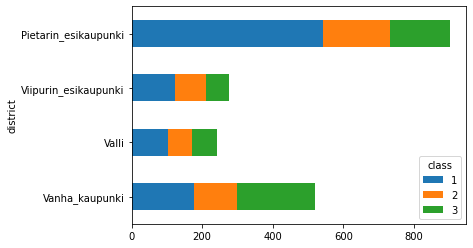

In [319]:
cross.loc['Vanha_kaupunki Valli Viipurin_esikaupunki Pietarin_esikaupunki'.split(' ')].plot(kind='barh', stacked=True)

<AxesSubplot:ylabel='district'>

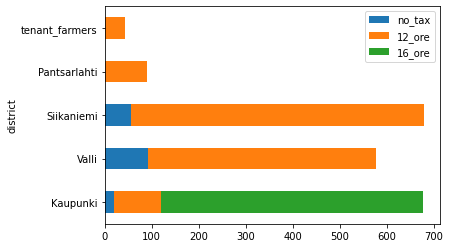

In [320]:
income_groups_1639.plot(kind='barh', stacked=True)

<AxesSubplot:ylabel='district'>

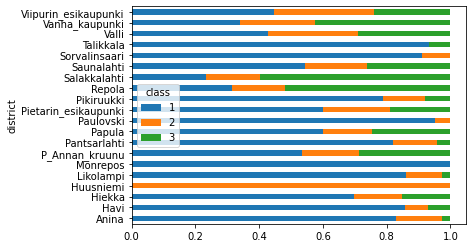

In [321]:
cross_pct.plot(kind='barh', stacked=True)

<AxesSubplot:ylabel='district'>

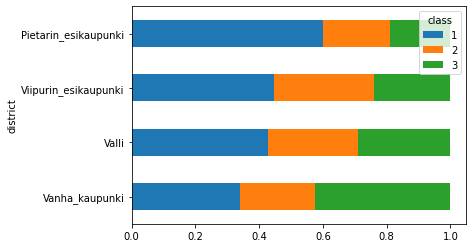

In [322]:
cross_pct.loc['Vanha_kaupunki Valli Viipurin_esikaupunki Pietarin_esikaupunki'.split(' ')].plot(kind='barh', stacked=True)

<AxesSubplot:ylabel='district'>

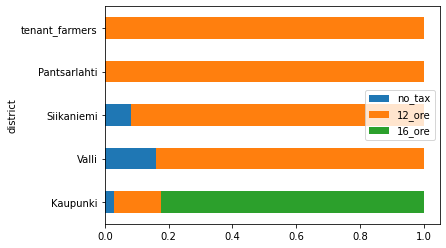

In [323]:
income_groups_1639_pct.plot(kind='barh', stacked=True)